In [ ]:
# %tensorflow_version 2.x

# Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol> <ol>* Adding dropout layer(s) </ol></ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model using Dropout</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [2]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [3]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [5]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

## 2. Pre-processing the data

In [7]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [8]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [9]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [10]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

### <ol>Adding dropout layer(s)</ol>

In [11]:
# importing the dropout layer
from keras.layers import Dropout

In [12]:
# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

C:\Anaconda\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## 5. Compiling the model

In [13]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [14]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

## 6. Training the model using Dropout

In [15]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - accuracy: 0.5391 - loss: 0.7625 - val_accuracy: 0.5609 - val_loss: 0.6825
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.5369 - loss: 0.7414 - val_accuracy: 0.5992 - val_loss: 0.6554
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 0.5568 - loss: 0.7192 - val_accuracy: 0.5864 - val_loss: 0.6513
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.6025 - loss: 0.6986 - val_accuracy: 0.6416 - val_loss: 0.6368
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.5778 - loss: 0.6987 - val_accuracy: 0.6402 - val_loss: 0.6352
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.5870 - loss: 0.6938 - val_accuracy: 0.6572 - val_loss: 0.6246
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.5969 - loss: 0.6886 - val_accuracy: 0.6700 - val_loss: 0.6229
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.5960 - loss: 0.7005 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7270 - loss: 0.5637 - val_accuracy: 0.7096 - val_loss: 0.5666
Epoch 52/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - accuracy: 0.7309 - loss: 0.5676 - val_accuracy: 0.7068 - val_loss: 0.5562
Epoch 53/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.7169 - loss: 0.5642 - val_accuracy: 0.7110 - val_loss: 0.5623
Epoch 54/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7030 - loss: 0.5660 - val_accuracy: 0.7082 - val_loss: 0.5587
Epoch 55/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7046 - loss: 0.5731 - val_accuracy: 0.7025 - val_loss: 0.5681
Epoch 56/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.7074 - loss: 0.5836 - val_accuracy: 0.7082 - val_loss: 0.5571
Epoch 57/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.7182 - loss: 0.5571 - val_accuracy: 0.7153 - val_loss: 0.5646
Epoch 58/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.7313 - loss: 0.5594 - val_accuracy:

## 7. Evaluating model performance

In [16]:
y_pred = model.predict(X_valid)
y_pred = np.where(y_pred <0.3, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [17]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, y_pred), '%')

Accuracy on validation set: 0.7124645892351275 %


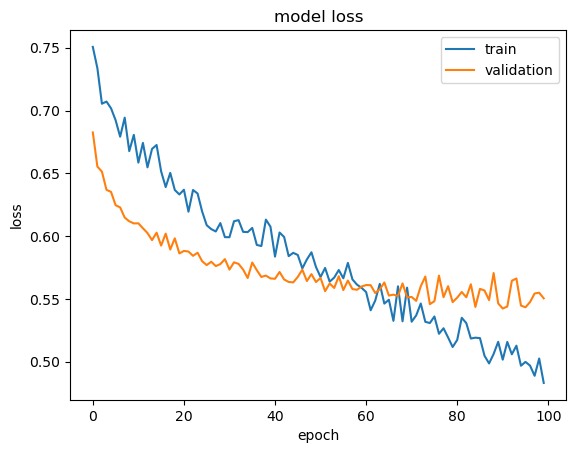

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()